In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt

from natsort import natsort_keygen

import statsmodels.api as sm
import scipy as sp

import os



# Load data

## Load WWTP sequencing data

In [2]:
# df = pd.read_csv('Data/tallymut_line_snv2.tsv', sep='\t', parse_dates=['date'])
df = pd.read_csv('data/tallymut_line_snv4.tsv', sep='\t', parse_dates=['date'])

df['mutation'] = df['pos'].astype(str) + df['base']

df.head()

,sample,batch,pos,date,plantcode,plantname,gene,base,cov,var,frac,P.1,D614G,B.1.1.7,B.1.351,mutation
0,B3_12_2021_02_13,20210226_JG6YF,733,2021-02-13,12.0,Lausanne (VD),ORF1ab,C,382,0,0.000000,extra,0,0,0,733C
1,B3_12_2021_02_13,20210226_JG6YF,913,2021-02-13,12.0,Lausanne (VD),ORF1ab,T,382,203,0.531414,0,0,extra,0,913T
2,B3_12_2021_02_13,20210226_JG6YF,1059,2021-02-13,12.0,Lausanne (VD),ORF1ab,T,11382,0,0.000000,0,0,0,mut,1059T
3,B3_12_2021_02_13,20210226_JG6YF,2749,2021-02-13,12.0,Lausanne (VD),ORF1ab,T,1039,0,0.000000,extra,0,0,0,2749T
4,B3_12_2021_02_13,20210226_JG6YF,3267,2021-02-13,12.0,Lausanne (VD),ORF1ab,T,3945,1509,0.382510,0,0,mut,0,3267T


In [3]:
df_wide = (
    df[(~df['plantname'].isna()) & (df['date'] >= '2020-12-08') & (df['base'] != '-') & (df['B.1.1.7'] == "mut")]
    .pivot(index=['plantname', 'date', 'batch'], columns=['mutation'], values='frac')
    .sort_index(axis=1, key=natsort_keygen())
)

df_wide.head()

mutation                                     3267T  5388A     6954C  23063T  \
plantname     date       batch                                                
Lausanne (VD) 2020-12-08 20201223_HWKGTDRXX    NaN    0.0       NaN     NaN   
                         20210129_JG6LR        0.0    NaN  0.064067     0.0   
              2020-12-09 20201223_HWKGTDRXX    0.0    0.0  0.000000     0.0   
                         20210129_JG6LR        0.0    0.0  0.000000     0.0   
              2020-12-10 20201223_HWKGTDRXX    0.0    0.0  0.000000     0.0   

mutation                                     23271A  23604A  23709T    24506G  \
plantname     date       batch                                                  
Lausanne (VD) 2020-12-08 20201223_HWKGTDRXX     0.0     0.0     0.0       NaN   
                         20210129_JG6LR         0.0     0.0     0.0  0.080863   
              2020-12-09 20201223_HWKGTDRXX     0.0     0.0     0.0  0.000000   
                         20210129_JG6LR         0.0     0.0     0.0  0.021505   
              2020-12-10 20201223_HWKGTDRXX     0.0     0.0     0.0  0.000000   

mutation                                       24914C  27972T  28048T  28111G  \
plantname     date       batch                                                  
Lausanne (VD) 2020-12-08 20201223_HWKGTDRXX  0.000000     0.0     0.0     0.0   
                         20210129_JG6LR      0.098097     0.0     0.0     0.0   
              2020-12-09 20201223_HWKGTDRXX  0.000000     0.0     0.0     0.0   
                         20210129_JG6LR      0.000000     0.0     0.0     0.0   
              2020-12-10 20201223_HWKGTDRXX  0.000063     0.0     0.0     0.0   

mutation                                       28280C    28281T    28282A  \
plantname     date       batch                                              
Lausanne (VD) 2020-12-08 20201223_HWKGTDRXX  0.000000  0.000000  0.000000   
                         20210129_JG6LR      0.000000  0.000000  0.000000   
              2020-12-09 20201223_HWKGTDRXX  0.000000  0.000000  0.000000   
                         20210129_JG6LR      0.049223  0.049223  0.049223   
              2020-12-10 20201223_HWKGTDRXX  0.000000  0.000000  0.000000   

mutation                                     28977T  
plantname     date       batch                       
Lausanne (VD) 2020-12-08 20201223_HWKGTDRXX     NaN  
                         20210129_JG6LR         0.0  
              2020-12-09 20201223_HWKGTDRXX     0.0  
                         20210129_JG6LR         0.0  
              2020-12-10 20201223_HWKGTDRXX     0.0

In [4]:
df_wide_cov = (
    df[(~df['plantname'].isna()) & (df['date'] >= '2020-12-08') & (df['base'] != '-') & (df['B.1.1.7'] == "mut")]
    .pivot(index=['plantname', 'date', 'batch'], columns=['mutation'], values='cov')
    .sort_index(axis=1, key=natsort_keygen())
)

df_wide_counts = (
    df[(~df['plantname'].isna()) & (df['date'] >= '2020-12-08') & (df['base'] != '-') & (df['B.1.1.7'] == "mut")]
    .pivot(index=['plantname', 'date', 'batch'], columns=['mutation'], values='var')
    .sort_index(axis=1, key=natsort_keygen())
)

## Load national viollier data

In [5]:
viollier = pd.read_csv("data/viollier_data.csv")
viollier.index = pd.to_datetime(viollier["year"].astype(str), format='%Y') +\
    pd.to_timedelta(((viollier["week"]-1).mul(7)+3-7).astype(str) + ' days')
viollier["frac_b117"] = viollier["b117"] / viollier["n"]
viollier["p_pseudo"] = (viollier["b117"] + 1) / viollier["n"]
viollier["error"] = 1.96*np.sqrt(viollier["p_pseudo"]*(1-viollier["p_pseudo"])/viollier["n"])

## Load cantonal viollier data and aggregate by week

In [6]:
viollier2 = pd.read_csv("data/data_per_day_and_canton2.csv")
viollier2["date"] = pd.DatetimeIndex(viollier2["date"])
viollier2["week"] = viollier2.date.dt.strftime('%W')
viollier2["year"] = viollier2.date.dt.strftime('%Y')
viollier2["date_week"] = pd.to_datetime(viollier2["year"].astype(str), format='%Y') +\
    pd.to_timedelta(((viollier2["week"].astype("int")-1).mul(7)+3-7).astype(str) + ' days')

viollier2_sum = viollier2.groupby(["date_week", "canton"], as_index=False).agg("sum")
viollier2_sum["frac_b117"] = viollier2_sum["b117"] / viollier2_sum["sequenced"]
viollier2_sum["p_pseudo"] = (viollier2_sum["b117"] + 1) / (viollier2_sum["sequenced"] + 2)
viollier2_sum["error"] = 1.96*np.sqrt(viollier2_sum["p_pseudo"]*(1-viollier2_sum["p_pseudo"])/(viollier2_sum["sequenced"]+2))

In [7]:
viollier2.head()

,date,canton,cases,sequenced,b117,week,year,date_week
0,2020-11-01,AG,110,0,0,43,2020,2020-10-17
1,2020-11-01,AI,3,0,0,43,2020,2020-10-17
2,2020-11-01,AR,14,0,0,43,2020,2020-10-17
3,2020-11-01,BE,299,0,0,43,2020,2020-10-17
4,2020-11-01,BL,59,0,0,43,2020,2020-10-17


In [8]:
gisaid_data = pd.read_csv("data/gisaid_seq_2021_05_04.csv")

In [9]:
gisaid_data = gisaid_data[gisaid_data.originating_lab == "Viollier AG"]

In [10]:
gisaid_data["b117"] = (gisaid_data.pangolin_lineage == "B.1.1.7")
gisaid_data_agg = pd.concat([gisaid_data[["date", "division", "pangolin_lineage"]].groupby(["date", "division"]).agg("count"),
           gisaid_data[["date", "division", "b117"]].groupby(["date", "division"]).agg("sum")],
          axis=1)

In [11]:
gisaid_data_agg = gisaid_data_agg.reset_index()

In [12]:
gisaid_data_agg["date"] = pd.DatetimeIndex(gisaid_data_agg["date"])
gisaid_data_agg["week"] = gisaid_data_agg.date.dt.strftime('%W')
gisaid_data_agg["year"] = gisaid_data_agg.date.dt.strftime('%Y')
gisaid_data_agg["date_week"] = pd.to_datetime(gisaid_data_agg["year"].astype(str), format='%Y') +\
    pd.to_timedelta(((gisaid_data_agg["week"].astype("int")-1).mul(7)+3-7).astype(str) + ' days')

In [13]:
gisaid_data_agg

,date,division,pangolin_lineage,b117,week,year,date_week
0,2020-03-04,Graubünden,1,0,09,2020,2020-02-22
1,2020-03-04,Ticino,1,0,09,2020,2020-02-22
2,2020-03-05,Basel-Land,2,0,09,2020,2020-02-22
3,2020-03-05,Basel-Stadt,1,0,09,2020,2020-02-22
4,2020-03-05,Graubünden,2,0,09,2020,2020-02-22
...,...,...,...,...,...,...,...
3256,2021-04-15,Thurgau,1,1,15,2021,2021-04-05
3257,2021-04-15,Valais,3,3,15,2021,2021-04-05
3258,2021-04-15,Vaud,2,2,15,2021,2021-04-05
3259,2021-04-15,Zug,1,1,15,2021,2021-04-05


In [14]:
gisaid_data["latest_batch"] = pd.to_datetime(gisaid_data["date_submitted"]) >= np.datetime64("2021-03-21")

gisaid_data_agg2 = pd.concat([gisaid_data[["date", "division", "pangolin_lineage", "latest_batch"]].groupby(["date", "division", "latest_batch"]).agg("count"),
           gisaid_data[["date", "division", "b117", "latest_batch"]].groupby(["date", "division", "latest_batch"]).agg("sum")],
          axis=1)

In [15]:
gisaid_data_agg2 = gisaid_data_agg2.reset_index()
gisaid_data_agg2["date"] = pd.DatetimeIndex(gisaid_data_agg2["date"])
gisaid_data_agg2["week"] = gisaid_data_agg2.date.dt.strftime('%W')
gisaid_data_agg2["year"] = gisaid_data_agg2.date.dt.strftime('%Y')
gisaid_data_agg2["date_week"] = pd.to_datetime(gisaid_data_agg2["year"].astype(str), format='%Y') +\
    pd.to_timedelta(((gisaid_data_agg2["week"].astype("int")-1).mul(7)+3-7).astype(str) + ' days')

In [16]:
canton_names = {
"Zürich" : "ZH",
"Bern" : "BE", 
"Lucerne" : "LU",
"Uri" : "UR",
"Schwyz" : "SZ",
"Obwalden" : "OW",
"Nidwalden" : "NW",
"Glarus" : "GL",
"Zug" : "ZG",
"Fribourg" : "FR",
"Solothurn" : "SO",
"Basel-Stadt" : "BS",
"Basel-Land" : "BL",
"Schaffhausen" : "SH",
"Appenzell Ausserrhoden" : "AR",
"Appenzell Innerrhoden" : "AI",
"Sankt Gallen" : "SG",
"Graubünden" : "GR",
"Aargau" : "AG",
"Thurgau" : "TG",
"Ticino" : "TI",
"Vaud" : "VD",
"Valais" : "VS",
"Neuchâtel" : "NE",
"Geneva" : "GE",
"Jura" : "JU"
}

In [17]:
gisaid_data_agg = gisaid_data_agg[gisaid_data_agg.division != "Switzerland"]
gisaid_data_agg["canton"] = gisaid_data_agg["division"].apply(lambda x: canton_names[x])
gisaid_data_agg = gisaid_data_agg.rename({"pangolin_lineage" : "sequenced"}, axis=1)
gisaid_data_agg

/tmp/ipykernel_21955/721544819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gisaid_data_agg["canton"] = gisaid_data_agg["division"].apply(lambda x: canton_names[x])


,date,division,sequenced,b117,week,year,date_week,canton
0,2020-03-04,Graubünden,1,0,09,2020,2020-02-22,GR
1,2020-03-04,Ticino,1,0,09,2020,2020-02-22,TI
2,2020-03-05,Basel-Land,2,0,09,2020,2020-02-22,BL
3,2020-03-05,Basel-Stadt,1,0,09,2020,2020-02-22,BS
4,2020-03-05,Graubünden,2,0,09,2020,2020-02-22,GR
...,...,...,...,...,...,...,...,...
3256,2021-04-15,Thurgau,1,1,15,2021,2021-04-05,TG
3257,2021-04-15,Valais,3,3,15,2021,2021-04-05,VS
3258,2021-04-15,Vaud,2,2,15,2021,2021-04-05,VD
3259,2021-04-15,Zug,1,1,15,2021,2021-04-05,ZG


In [18]:
gisaid_data_agg2 = gisaid_data_agg2[gisaid_data_agg2.division != "Switzerland"]
gisaid_data_agg2["canton"] = gisaid_data_agg2["division"].apply(lambda x: canton_names[x])
gisaid_data_agg2 = gisaid_data_agg2.rename({"pangolin_lineage" : "sequenced"}, axis=1)
gisaid_data_agg2

,date,division,latest_batch,sequenced,b117,week,year,date_week,canton
0,2020-03-04,Graubünden,False,1,0,09,2020,2020-02-22,GR
1,2020-03-04,Ticino,False,1,0,09,2020,2020-02-22,TI
2,2020-03-05,Basel-Land,False,2,0,09,2020,2020-02-22,BL
3,2020-03-05,Basel-Stadt,False,1,0,09,2020,2020-02-22,BS
4,2020-03-05,Graubünden,False,2,0,09,2020,2020-02-22,GR
...,...,...,...,...,...,...,...,...,...
3770,2021-04-15,Thurgau,True,1,1,15,2021,2021-04-05,TG
3771,2021-04-15,Valais,True,3,3,15,2021,2021-04-05,VS
3772,2021-04-15,Vaud,True,2,2,15,2021,2021-04-05,VD
3773,2021-04-15,Zug,True,1,1,15,2021,2021-04-05,ZG


In [19]:
viollier2 = gisaid_data_agg

# Do resampling confint for lowess

In [20]:
def resample_fn(x, nsamples):
    return np.array([np.mean(np.random.choice(x[np.isnan(x)==False],
                                              x[np.isnan(x)==False].shape[0],
                                              replace=True)) \
            for i in range(nsamples)])

lowess = sm.nonparametric.lowess

In [22]:
VDdf = df_wide.loc['Lausanne (VD)'].dropna(axis=1, how='all').T  # .loc[28111:28111]
VDyres = VDdf.T.apply(lambda x: resample_fn(x, 1000), 1)

VDyres2 = pd.DataFrame(np.array([i for i in VDyres.values]))
VDyres2.index = VDyres.index

VDagg1 = VDyres2.groupby("date").agg("mean").asfreq('D')
VDagg2 = VDagg1.apply(lambda x: x.rolling(7, min_periods=1).mean(), 0)
VDagg3 = VDagg1.apply(lambda x: lowess(x, np.arange(x.shape[0]).astype("float64"),
                                       xvals = np.arange(x.shape[0]).astype("float64"),
                                       frac= 1./3, it=0), 0)



In [24]:
ZHdf = df_wide.loc['Zürich (ZH)'].dropna(axis=1, how='all').T  # .loc[28111:28111]
ZHyres = ZHdf.T.apply(lambda x: resample_fn(x, 1000), 1)

ZHyres2 = pd.DataFrame(np.array([i for i in ZHyres.values]))
ZHyres2.index = ZHyres.index

ZHagg1 = ZHyres2.groupby("date").agg("mean").asfreq('D')
ZHagg2 = ZHagg1.apply(lambda x: x.rolling(7, min_periods=1).mean(), 0)
ZHagg3 = ZHagg1.apply(lambda x: lowess(x, np.arange(x.shape[0]).astype("float64"),
                                       xvals = np.arange(x.shape[0]).astype("float64"),
                                       frac= 1./3, it=0), 0)


In [25]:
viollier2["date"] = pd.to_datetime(viollier2["date"])

viollierZH = viollier2[viollier2["canton"]=="ZH"]
viollierZH = viollierZH.sort_values("date")
viollierZH["frac"] = viollierZH["b117"] / viollierZH["sequenced"]
viollierZH = viollierZH[(viollierZH["date"] >= np.datetime64("2020-12-08")) & (viollierZH["date"] <= np.datetime64("2021-02-11"))]

lowess = sm.nonparametric.lowess
viollierZH["loess"] = lowess(endog=viollierZH["frac"],
                             exog=np.arange(viollierZH.shape[0]).astype("float64"),
                             xvals=np.arange(viollierZH.shape[0]).astype("float64"),
                             frac= 2./3, it=3)

viollierVD = viollier2[viollier2["canton"]=="VD"]
viollierVD = viollierVD.sort_values("date")
viollierVD["frac"] = viollierVD["b117"] / viollierVD["sequenced"]
viollierVD = viollierVD[(viollierVD["date"] >= np.datetime64("2020-12-08")) & (viollierVD["date"] <= np.datetime64("2021-02-11"))]

lowess = sm.nonparametric.lowess
viollierVD["loess"] = lowess(endog=viollierVD["frac"],
                             exog=np.arange(viollierVD.shape[0]).astype("float64"),
                             xvals=np.arange(viollierVD.shape[0]).astype("float64"),
                             frac= 2./3, it=3)


In [26]:
viollier2["date"] = pd.to_datetime(viollier2["date"])

viollierZH = viollier2[viollier2["canton"]=="ZH"]
viollierZH = viollierZH.sort_values("date")
viollierZH["frac"] = viollierZH["b117"] / viollierZH["sequenced"]
viollierZH = viollierZH[(viollierZH["date"] >= np.datetime64("2020-12-08")) & (viollierZH["date"] <= np.datetime64("2021-02-11"))]

lowess = sm.nonparametric.lowess
viollierZH["loess"] = lowess(endog=viollierZH["frac"],
                             exog=np.arange(viollierZH.shape[0]).astype("float64"),
                             xvals=np.arange(viollierZH.shape[0]).astype("float64"),
                             frac= 1./3, it=3)

viollierVD = viollier2[viollier2["canton"]=="VD"]
viollierVD = viollierVD.sort_values("date")
viollierVD["frac"] = viollierVD["b117"] / viollierVD["sequenced"]
viollierVD = viollierVD[(viollierVD["date"] >= np.datetime64("2020-12-08")) & (viollierVD["date"] <= np.datetime64("2021-02-13"))]

lowess = sm.nonparametric.lowess
viollierVD["loess"] = lowess(endog=viollierVD["frac"],
                             exog=np.arange(viollierVD.shape[0]).astype("float64"),
                             xvals=np.arange(viollierVD.shape[0]).astype("float64"),
                             frac= 1./3, it=3)


## Resample clinical loess

# Remake clinical loess by resampling cases

In [27]:
viollierZH2 = viollierZH[(viollierZH["date"] >= np.datetime64("2020-12-08")) & (viollierZH["date"] <= np.datetime64("2021-02-11"))]
viollierVD2 = viollierVD[(viollierVD["date"] >= np.datetime64("2020-12-08")) & (viollierVD["date"] <= np.datetime64("2021-02-13"))]

### Create extended df with one row per case

In [28]:
ZH1hotdfs = []
for d in viollierZH2["date"]:
    for i in range(viollierZH2[viollierZH2["date"]==d]["b117"].values[0]):
        ZH1hotdfs.append(pd.DataFrame({"date":d, "wt":0, "b117":1}, index=[0]))
    for i in range(viollierZH2[viollierZH2["date"]==d]["sequenced"].values[0] - viollierZH2[viollierZH2["date"]==d]["b117"].values[0]):
        ZH1hotdfs.append(pd.DataFrame({"date":d, "wt":1, "b117":0}, index=[0]))
viollierZH2_1hot = pd.concat(ZH1hotdfs).reset_index(drop=True)

In [29]:
VD1hotdfs = []
for d in viollierVD2["date"]:
    for i in range(viollierVD2[viollierVD2["date"]==d]["b117"].values[0]):
        VD1hotdfs.append(pd.DataFrame({"date":d, "wt":0, "b117":1}, index=[0]))
    for i in range(viollierVD2[viollierVD2["date"]==d]["sequenced"].values[0] - viollierVD2[viollierVD2["date"]==d]["b117"].values[0]):
        VD1hotdfs.append(pd.DataFrame({"date":d, "wt":1, "b117":0}, index=[0]))
viollierVD2_1hot = pd.concat(VD1hotdfs).reset_index(drop=True)

### resample cases

In [30]:
ZHclinlowess = []
np.random.seed(42)
for i in range(1000):
    resamp_df = viollierZH2_1hot.iloc[np.random.randint(0, viollierZH2_1hot.shape[0], viollierZH2_1hot.shape[0]),:]
    resamp_df = resamp_df.groupby("date").agg("sum").reindex(viollierZH2["date"])
    resamp_df["freq"] = resamp_df["b117"] / (resamp_df["b117"] + resamp_df["wt"])
    ZHclinlowess.append(lowess(resamp_df["freq"],
                               np.arange(resamp_df.shape[0]).astype("float64"),
                               xvals=np.arange(resamp_df.shape[0]).astype("float64"), frac=1./3))

In [31]:
VDclinlowess = []
np.random.seed(42)
for i in range(1000):
    resamp_df = viollierVD2_1hot.iloc[np.random.randint(0, viollierVD2_1hot.shape[0], viollierVD2_1hot.shape[0]),:]
    resamp_df = resamp_df.groupby("date").agg("sum").reindex(viollierVD2["date"])
    resamp_df["freq"] = resamp_df["b117"] / (resamp_df["b117"] + resamp_df["wt"])
    VDclinlowess.append(lowess(resamp_df["freq"],
                               np.arange(resamp_df.shape[0]).astype("float64"),
                               xvals=np.arange(resamp_df.shape[0]).astype("float64"), frac=1./3))

In [32]:
viollierZH3 = gisaid_data_agg2[(gisaid_data_agg2.canton == "ZH") & (gisaid_data_agg2["date"] >= np.datetime64("2020-12-08")) & (gisaid_data_agg2["date"] <= np.datetime64("2021-02-11"))]
viollierVD3 = gisaid_data_agg2[(gisaid_data_agg2.canton == "VD") & (gisaid_data_agg2["date"] >= np.datetime64("2020-12-08")) & (gisaid_data_agg2["date"] <= np.datetime64("2021-02-13"))]

viollierZH3["frac"] = viollierZH3.b117 / viollierZH3.sequenced
viollierVD3["frac"] = viollierVD3.b117 / viollierVD3.sequenced

viollierZH3 = viollierZH3.set_index("date")
viollierZH3_late = viollierZH3[viollierZH3.latest_batch == True].reindex(viollierZH2.set_index("date").asfreq('D').index)
viollierZH3_early = viollierZH3[viollierZH3.latest_batch == False].reindex(viollierZH2.set_index("date").asfreq('D').index)

viollierVD3 = viollierVD3.set_index("date")
viollierVD3_late = viollierVD3[viollierVD3.latest_batch == True].reindex(viollierVD2.set_index("date").asfreq('D').index)
viollierVD3_early = viollierVD3[viollierVD3.latest_batch == False].reindex(viollierVD2.set_index("date").asfreq('D').index)




/tmp/ipykernel_21955/1429580163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viollierZH3["frac"] = viollierZH3.b117 / viollierZH3.sequenced
/tmp/ipykernel_21955/1429580163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viollierVD3["frac"] = viollierVD3.b117 / viollierVD3.sequenced


# Make and output plots

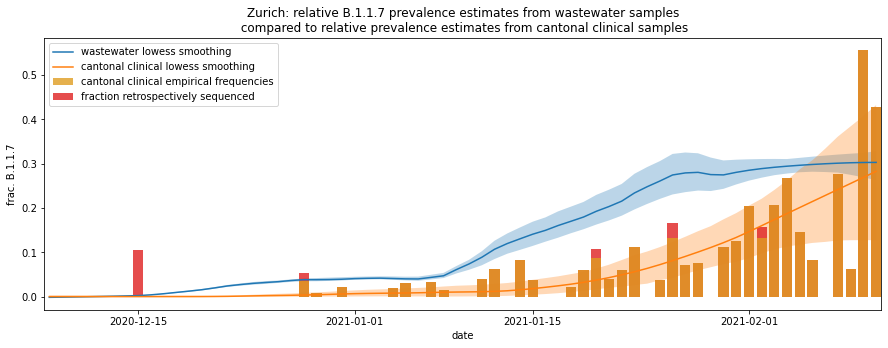

In [33]:
# import matplotlib.gridspec as gridspec
ZHdf = df_wide.loc['Zürich (ZH)'].dropna(axis=1, how='all').T  # .loc[28111:28111]
ZHdf = ZHdf.T.groupby("date").agg("mean").asfreq('D').T

fig, ax = plt.subplots(nrows=1, figsize=(15, 5), sharex=False)
ax = [ax]

xvals = ZHdf.T.index.astype("str")
yvals = ZHdf.apply(np.mean, 0)

### 

sns.lineplot(x=xvals, y=ZHagg3.apply(np.mean, 1), ax=ax[0], label="wastewater lowess smoothing")
ax[0].fill_between(xvals,
                     ZHagg3.apply(lambda x: np.percentile(x, 5), 1).interpolate(),
                     ZHagg3.apply(lambda x: np.percentile(x, 95), 1).interpolate(),
                     alpha=.3)

sns.lineplot(x=viollierZH2.date.astype("str"), y=np.nanmean(np.array(ZHclinlowess), axis=0),
             ax=ax[0], label="cantonal clinical lowess smoothing")
ax[0].fill_between(viollierZH2.date.astype("str"),
                     np.nanpercentile(np.array(ZHclinlowess), q=2.5, axis=0),
                     np.nanpercentile(np.array(ZHclinlowess), q=97.5, axis=0),
                     alpha=.3)

# sns.barplot(x=viollierZH3.index.astype("str"), y=viollierZH3["frac"],
#             ax=ax[0], label="cantonal clinical empirical frequencies", color="orange", alpha=0.5)
sns.barplot(x=viollierZH3_early.index.astype("str"),
            y=(viollierZH3_early["b117"].fillna(0) + viollierZH3_late["b117"].fillna(0)) / (viollierZH3_early["sequenced"].fillna(0) + viollierZH3_late["sequenced"].fillna(0)),
            label="fraction retrospectively sequenced", color="red", alpha=0.8,
           ax=ax[0])
sns.barplot(x=viollierZH3_early.index.astype("str"),
            y=(viollierZH3_early["b117"].fillna(0)) / (viollierZH3_early["sequenced"].fillna(0) + viollierZH3_late["sequenced"].fillna(0)),
            label="cantonal clinical empirical frequencies", color="orange", alpha=0.8,
           ax=ax[0])

# ax[0].set_ylim((0,0.125))
# ax[0].set_xlim((np.datetime64("2020-12-22"), np.datetime64("2021-02-15")))
ax[0].set_ylabel("frac. B.1.1.7")
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend([handles[i] for i in [0,1,3,2]], [labels[i] for i in [0,1,3,2]], loc="upper left")
ax[0].set_title('Zurich: relative B.1.1.7 prevalence estimates from wastewater samples\n compared to relative prevalence estimates from cantonal clinical samples')
ax[0].set_xticks(["2020-12-15", "2021-01-01", "2021-01-15", "2021-02-01", "2021-02-15"])

# ax[0].set_xticklabels(labels=xvals, rotation=90, ha='center')
ax[0].margins(x=0)
plt.savefig("plots/ZurPlot2b.pdf", bbox_inches='tight')
plt.show()


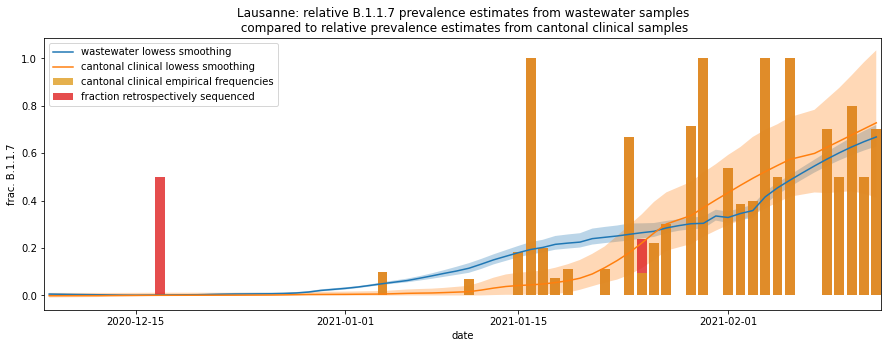

In [34]:
VDdf = df_wide.loc['Lausanne (VD)'].dropna(axis=1, how='all').T  # .loc[28111:28111]
VDdf = VDdf.T.groupby("date").agg("mean").asfreq('D').T

fig, ax = plt.subplots(nrows=1, figsize=(15, 5), sharex=False)
ax = [ax]

xvals = VDdf.T.index.astype("str")
yvals = VDdf.apply(np.mean, 0)

### 

sns.lineplot(x=xvals, y=VDagg3.apply(np.mean, 1), ax=ax[0], label="wastewater lowess smoothing")
ax[0].fill_between(xvals,
                     VDagg3.apply(lambda x: np.percentile(x, 5), 1).interpolate(),
                     VDagg3.apply(lambda x: np.percentile(x, 95), 1).interpolate(),
                     alpha=.3)

sns.lineplot(x=viollierVD2["date"].astype("str"), y=np.nanmean(np.array(VDclinlowess), axis=0),
             ax=ax[0], label="cantonal clinical lowess smoothing")
ax[0].fill_between(viollierVD2["date"].astype("str"),
                     np.nanpercentile(np.array(VDclinlowess), q=2.5, axis=0),
                     np.nanpercentile(np.array(VDclinlowess), q=97.5, axis=0),
                     alpha=.3)

sns.barplot(x=viollierVD3_early.index.astype("str"),
            y=(viollierVD3_early["b117"].fillna(0) + viollierVD3_late["b117"].fillna(0)) / (viollierVD3_early["sequenced"].fillna(0) + viollierVD3_late["sequenced"].fillna(0)),
            label="fraction retrospectively sequenced", color="red", alpha=0.8,
           ax=ax[0])
sns.barplot(x=viollierVD3_early.index.astype("str"),
            y=(viollierVD3_early["b117"].fillna(0)) / (viollierVD3_early["sequenced"].fillna(0) + viollierVD3_late["sequenced"].fillna(0)),
            label="cantonal clinical empirical frequencies", color="orange", alpha=0.8,
           ax=ax[0])



# ax[0].set_ylim((0,0.125))
ax[0].set_ylabel("frac. B.1.1.7")
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend([handles[i] for i in [0,1,3,2]], [labels[i] for i in [0,1,3,2]], loc="upper left")
ax[0].set_title('Lausanne: relative B.1.1.7 prevalence estimates from wastewater samples\n compared to relative prevalence estimates from cantonal clinical samples')
ax[0].set_xticks(["2020-12-15", "2021-01-01", "2021-01-15", "2021-02-01", "2021-02-15"])

# ax[0].set_xticklabels(labels=xvals, rotation=90, ha='center')
# fig.autofmt_xdate()
ax[0].margins(x=0)
plt.savefig("plots/LausPlot2b.pdf", bbox_inches='tight', pad_inches=0)
plt.show()